In [2]:
#import libraries
import os
import random as rd
import tensorflow as tf
import matplotlib.pyplot as plt
import pyBigWig as pbg
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
import matplotlib as mpl
import keras.backend as K
import pandas as pd
import logomaker as lm
import seaborn as sns

In [2]:
def mae(y_true,y_pred):
    return np.asarray(K.mean(K.abs(y_true - y_pred))).round(3)

def mse(y_true,y_pred):
    return np.asarray(np.mean((y_true - y_pred)**2)).round(3)

In [3]:
#load all chrs
X_2L=np.load('/home/florian/projet/r6.16/seq.npz')['2L']
X_2R=np.load('/home/florian/projet/r6.16/seq.npz')['2R']
X_3L=np.load('/home/florian/projet/r6.16/seq.npz')['3L']
X_3R=np.load('/home/florian/projet/r6.16/seq.npz')['3R']
X_4=np.load('/home/florian/projet/r6.16/seq.npz')['4']
X_X=np.load('/home/florian/projet/r6.16/seq.npz')['X']
X_Y=np.load('/home/florian/projet/r6.16/seq.npz')['Y']

In [4]:
#load all reverse chrs
X_2L=np.load('/home/florian/projet/r6.16/seq_reverse_complement.npz')['2L']
X_2R=np.load('/home/florian/projet/r6.16/seq_reverse_complement.npz')['2R']
X_3L=np.load('/home/florian/projet/r6.16/seq_reverse_complement.npz')['3L']
X_3R=np.load('/home/florian/projet/r6.16/seq_reverse_complement.npz')['3R']
X_4=np.load('/home/florian/projet/r6.16/seq_reverse_complement.npz')['4']
X_X=np.load('/home/florian/projet/r6.16/seq_reverse_complement.npz')['X']
X_Y=np.load('/home/florian/projet/r6.16/seq_reverse_complement.npz')['Y']

In [4]:
# create scATAC values for each chr
cut=500
Y_2L=np.load('/home/florian/projet/scATACseq_14chr.npz')['2L'][0]
Y_2L[Y_2L >= cut] = cut
Y_2L=Y_2L/cut

Y_2R=np.load('/home/florian/projet/scATACseq_14chr.npz')['2R'][0]
Y_2R[Y_2R >= cut] = cut
Y_2R=Y_2R/cut

Y_3L=np.load('/home/florian/projet/scATACseq_14chr.npz')['3L'][0]
Y_3L[Y_3L >= cut] = cut
Y_3L=Y_3L/cut

Y_3R=np.load('/home/florian/projet/scATACseq_14chr.npz')['3R'][0]
Y_3R[Y_3R >= cut] = cut
Y_3R=Y_3R/cut

Y_4=np.load('/home/florian/projet/scATACseq_14chr.npz')['4'][0]
Y_4[Y_4 >= cut] = cut
Y_4=Y_4/cut

Y_X=np.load('/home/florian/projet/scATACseq_14chr.npz')['X'][0]
Y_X[Y_X >= cut] = cut
Y_X=Y_X/cut

Y_Y=np.load('/home/florian/projet/scATACseq_14chr.npz')['Y'][0]
Y_Y[Y_Y >= 80] = 80
Y_Y=Y_Y/80

In [35]:
df = pd.read_csv ('/home/florian/projet/models/new_cut_weightless_501bp/history.csv')
pred2L=np.load('/home/florian/projet/models/preds_new_cut_weightless_501bp.npz')['pred2L']
pred2R=np.load('/home/florian/projet/models/preds_new_cut_weightless_501bp.npz')['pred2R']
pred3L=np.load('/home/florian/projet/models/preds_new_cut_weightless_501bp.npz')['pred3L']
pred3R=np.load('/home/florian/projet/models/preds_new_cut_weightless_501bp.npz')['pred3R']
pred4=np.load('/home/florian/projet/models/preds_new_cut_weightless_501bp.npz')['pred4']
predX=np.load('/home/florian/projet/models/preds_new_cut_weightless_501bp.npz')['predX']
predY=np.load('/home/florian/projet/models/preds_new_cut_weightless_501bp.npz')['predY']
corr2L=round(np.corrcoef(Y_2L[::10],pred2L)[0][1],3)
corr2R=round(np.corrcoef(Y_2R[::10],pred2R)[0][1],3)
corr3R=round(np.corrcoef(Y_3R[1::10],pred3R)[0][1],3)#1
corr3L=round(np.corrcoef(Y_3L[::10],pred3L)[0][1],3)
corr4=round(np.corrcoef(Y_4[1::10],pred4)[0][1],3)#1
corrX=round(np.corrcoef(Y_X[1::10],predX)[0][1],3)#1
corrY=round(np.corrcoef(Y_Y[::10],predY)[0][1],3)
mse2L=mse(Y_2L[::10],pred2L)
mse2R=mse(Y_2R[::10],pred2R)
mse3L=mse(Y_3L[::10],pred3L)
mse3R=mse(Y_3R[1::10],pred3R)
mse4=mse(Y_4[1::10],pred4)
mseX=mse(Y_X[1::10],predX)
mseY=mse(Y_Y[::10],predY)
# corr2L=np.corrcoef(Y_2L[::5],pred2L)[0][1]
# corr2R=np.corrcoef(Y_2R[1::5],pred2R)[0][1]
# corr3R=np.corrcoef(Y_3R[1::5],pred3R)[0][1]#1
# corr3L=np.corrcoef(Y_3L[::5],pred3L)[0][1]
# corr4=np.corrcoef(Y_4[1::5],pred4)[0][1]#1
# corrX=np.corrcoef(Y_X[1::5],predX)[0][1]#1
# corrY=np.corrcoef(Y_Y[::5],predY)[0][1]
# corr2L=np.corrcoef(Y_2L,pred2L.ravel())[0][1]
# corr2R=np.corrcoef(Y_2R,pred2R.ravel())[0][1]
# corr3R=np.corrcoef(Y_3R,pred3R.ravel())[0][1]
# corr3L=np.corrcoef(Y_3L,pred3L.ravel())[0][1]
# corr4=np.corrcoef(Y_4,pred4.ravel())[0][1]
# corrX=np.corrcoef(Y_X,predX.ravel())[0][1]
# corrY=np.corrcoef(Y_Y,predY.ravel())[0][1]

NameError: name 'mse' is not defined

In [86]:
rpred2L=np.load('/home/florian/projet/models/preds_test_reverse_complement.npz')['pred2L']
rpred2R=np.load('/home/florian/projet/models/preds_test_reverse_complement.npz')['pred2R']
rpred3L=np.load('/home/florian/projet/models/preds_test_reverse_complement.npz')['pred3L']
rpred3R=np.load('/home/florian/projet/models/preds_test_reverse_complement.npz')['pred3R']
rpred4=np.load('/home/florian/projet/models/preds_test_reverse_complement.npz')['pred4']
rpredX=np.load('/home/florian/projet/models/preds_test_reverse_complement.npz')['predX']
rpredY=np.load('/home/florian/projet/models/preds_test_reverse_complement.npz')['predY']
Ccorr2L=np.corrcoef(rpred2L[::-1],pred2L)[0][1]
Ccorr2R=np.corrcoef(rpred2R[::-1],pred2R)[0][1]
Ccorr3R=np.corrcoef(rpred3R[::-1],pred3R)[0][1]#1
Ccorr3L=np.corrcoef(rpred3L[::-1],pred3L)[0][1]
Ccorr4=np.corrcoef(rpred4[::-1],pred4)[0][1]#1
CcorrX=np.corrcoef(rpredX[::-1],predX)[0][1]#1
CcorrY=np.corrcoef(rpredY[::-1],predY)[0][1]
corr2L=np.corrcoef(Y_2L[::-10],rpred2L)[0][1]
corr2R=np.corrcoef(Y_2R[::-10],rpred2R)[0][1]
corr3R=np.corrcoef(Y_3R[-2::-10],rpred3R)[0][1]#1
corr3L=np.corrcoef(Y_3L[::-10],rpred3L)[0][1]
corr4=np.corrcoef(Y_4[-2::-10],rpred4)[0][1]#1
corrX=np.corrcoef(Y_X[-2::-10],rpredX)[0][1]#1
corrY=np.corrcoef(Y_Y[::-10],rpredY)[0][1]


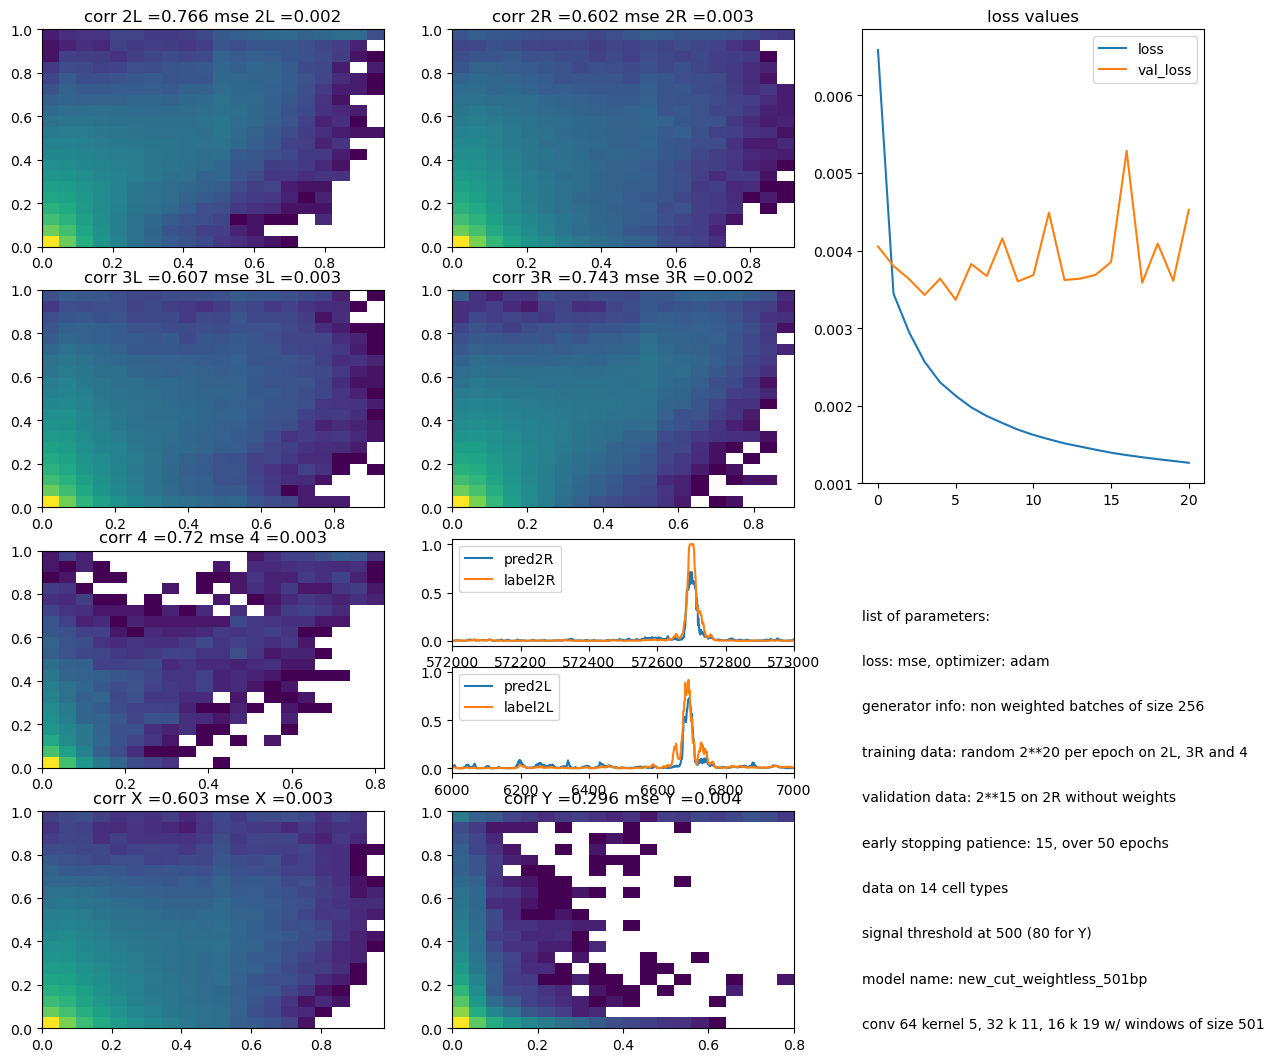

In [104]:
#plots

plt.figure(figsize=(15,10))

plt.subplot(4,3,1)
plt.hist2d(pred2L,Y_2L[::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr 2L ='+str(corr2L)+' mse 2L ='+str(mse2L))

plt.subplot(4,3,2)
plt.hist2d(pred2R,Y_2R[::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr 2R ='+str(corr2R)+' mse 2R ='+str(mse2R))

plt.subplot(4,3,4)
plt.hist2d(pred3L,Y_3L[::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr 3L ='+str(corr3L)+' mse 3L ='+str(mse3L))

plt.subplot(4,3,5)
plt.hist2d(pred3R,Y_3R[1::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr 3R ='+str(corr3R)+' mse 3R ='+str(mse3R))

plt.subplot(4,3,7)
plt.hist2d(pred4,Y_4[1::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr 4 ='+str(corr4)+' mse 4 ='+str(mse4))

plt.subplot(4,3,10)
plt.hist2d(predX,Y_X[1::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr X ='+str(corrX)+' mse X ='+str(mseX))

plt.subplot(4,3,11)
plt.hist2d(predY,Y_Y[::10],bins=20,norm=mpl.colors.LogNorm())
plt.title('corr Y ='+str(corrY)+' mse Y ='+str(mseY))

plt.subplot(2,3,3)
plt.plot(df['loss'],label='loss')
plt.plot(df['val_loss'],label="val_loss")
plt.legend()
plt.title('loss values')

plt.subplot(8,3,14)
plt.plot(pred2R,label='pred2R')
plt.plot(Y_2R[::10],label='label2R')
plt.xlim(572000,573000)
plt.legend()

plt.subplot(8,3,17)
plt.plot(pred2L,label='pred2L')
plt.plot(Y_2L[::10],label='label2L')
plt.xlim(6000,7000)
plt.legend()

plt.subplot(2,3,6)
plt.axis([0, 10, 0, 10])
plt.text(0,9,"list of parameters:")
plt.text(0,8,"loss: mse, optimizer: adam")
plt.text(0,7,"generator info: non weighted batches of size 256")
plt.text(0,6,"training data: random 2**20 per epoch on 2L, 3R and 4")
plt.text(0,5,"validation data: 2**15 on 2R without weights")
plt.text(0,4,"early stopping patience: 15, over 50 epochs")
plt.text(0,3,"data on 14 cell types")
plt.text(0,2,"signal threshold at 500 (80 for Y)")
plt.text(0,1,"model name: new_cut_weightless_501bp")
plt.text(0,0,"conv 64 kernel 5, 32 k 11, 16 k 19 w/ windows of size 501")

plt.axis("off")

plt.subplots_adjust(bottom=0.001, top=0.9999)


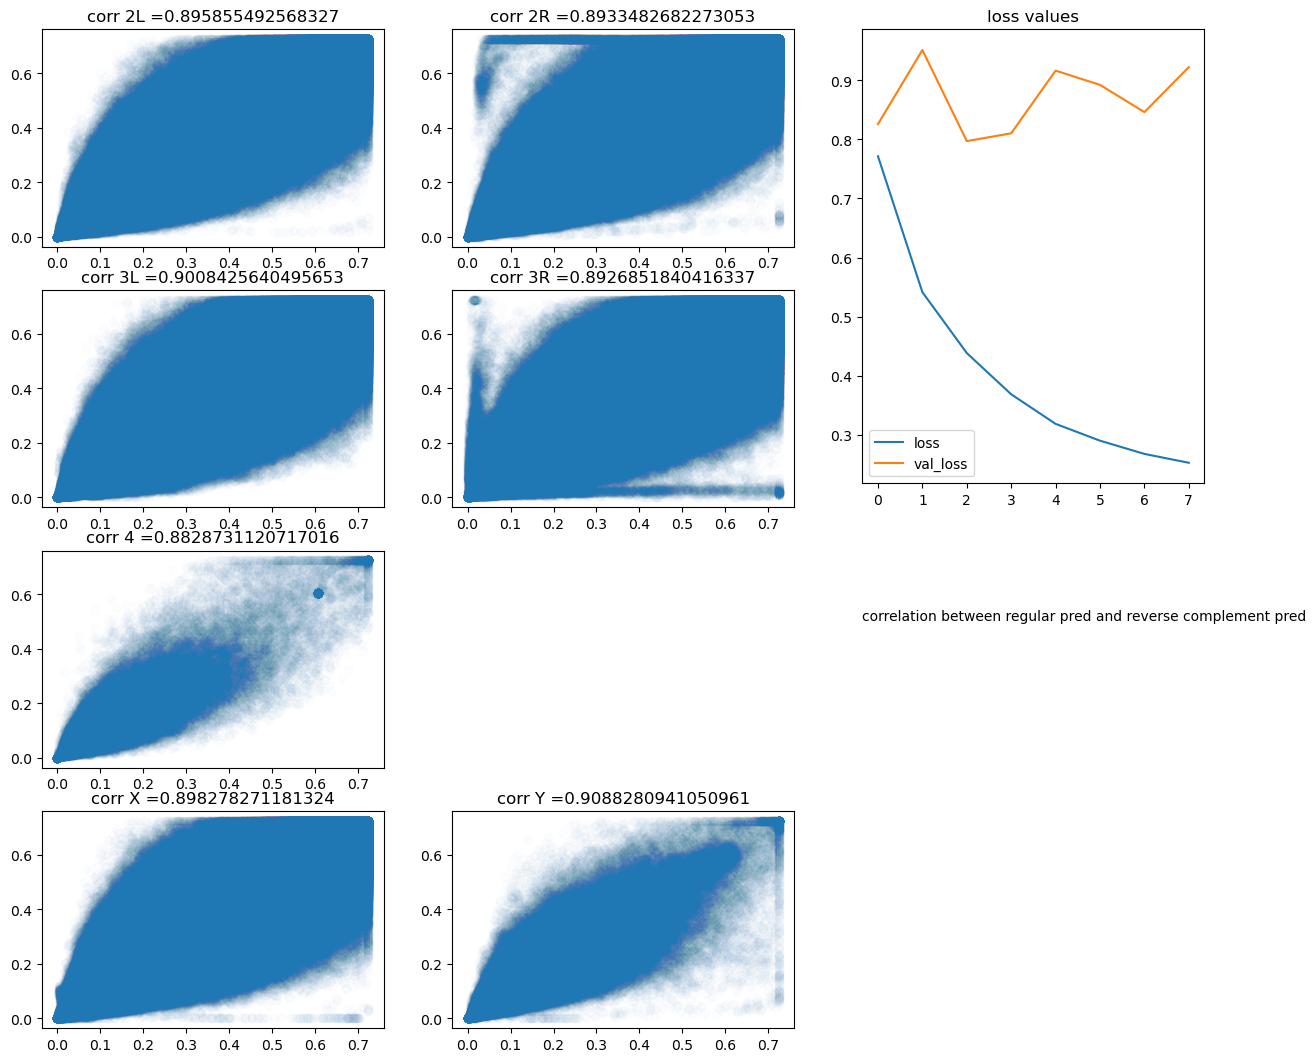

In [120]:
plt.figure(figsize=(15,10))
plt.subplot(4,3,1)
plt.scatter(pred2L,rpred2L[::-1],alpha=0.01)
plt.title('corr 2L ='+str(Ccorr2L))

plt.subplot(4,3,2)
plt.scatter(pred2R,rpred2R[::-1],alpha=0.01)
plt.title('corr 2R ='+str(Ccorr2R))

plt.subplot(4,3,4)
plt.scatter(pred3L,rpred3L[::-1],alpha=0.01)
plt.title('corr 3L ='+str(Ccorr3L))

plt.subplot(4,3,5)
plt.scatter(pred3R,rpred3R[::-1],alpha=0.01)
plt.title('corr 3R ='+str(Ccorr3R))

plt.subplot(4,3,7)
plt.scatter(pred4,rpred4[::-1],alpha=0.01)
plt.title('corr 4 ='+str(Ccorr4))

plt.subplot(4,3,10)
plt.scatter(predX,rpredX[::-1],alpha=0.01)
plt.title('corr X ='+str(CcorrX))

plt.subplot(4,3,11)
plt.scatter(predY,rpredY[::-1],alpha=0.01)
plt.title('corr Y ='+str(CcorrY))

plt.subplot(2,3,3)
plt.plot(df['loss'],label='loss')
plt.plot(df['val_loss'],label="val_loss")
plt.legend()
plt.title('loss values')

plt.subplot(2,3,6)
plt.axis([0, 10, 0, 10])
plt.text(0,9,"correlation between regular pred and reverse complement pred")
# plt.text(0,8,"loss: mse+cor, optimizer: adam")
# plt.text(0,7,"generator info: global normalized weights with batches of size 4096")
# plt.text(0,6,"training data: random 2**20 per epoch on 2R and 3L")
# plt.text(0,5,"validation data: 2**14 on 3R")
# plt.text(0,4,"early stopping patience: 5, over 20 epochs")
# plt.text(0,3,"data on 14 cell types")
# plt.text(0,2,"signal cut at 100")
# plt.text(0,1,"model name: reverse_complement")
# plt.text(0,0,"conv 64 kernel 5, 32 k 11, 16 k 19")

plt.axis("off")

plt.subplots_adjust(bottom=0.001, top=0.9999)

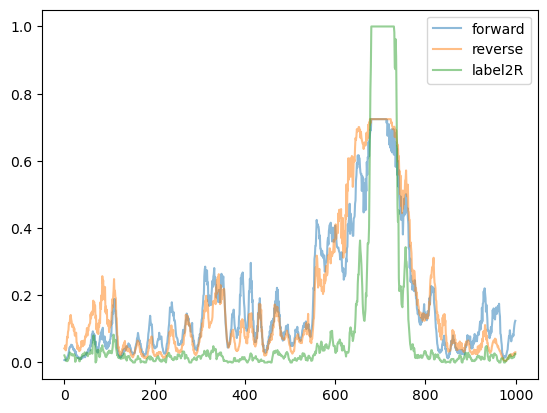

In [30]:
plt.plot(pred2R[572_000:573_000],alpha=0.5,label="forward")
plt.plot(rpred2R[len(rpred2R)-572_000:len(rpred2R)-573_000:-1],alpha=0.5,label="reverse")
plt.plot(Y_2R[5_720_000:5_730_000:10],alpha=0.5,label='label2R')
plt.legend()

(0.001, 15)

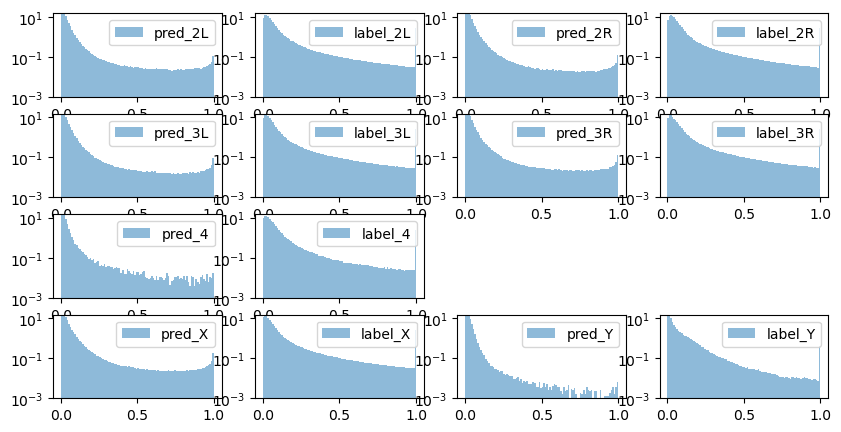

In [110]:
plt.figure(figsize=(10,5))
plt.subplot(4,4,1)
plt.yscale("log")
plt.hist(pred2L,bins=100,alpha=0.5,label="pred_2L",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,2)
plt.yscale("log")
plt.hist(Y_2L,bins=100,alpha=0.5,label="label_2L",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,3)
plt.yscale("log")
plt.hist(pred2R,bins=100,alpha=0.5,label="pred_2R",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,4)
plt.yscale("log")
plt.hist(Y_2R,bins=100,alpha=0.5,label="label_2R",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,5)
plt.yscale("log")
plt.hist(pred3L,bins=100,alpha=0.5,label="pred_3L",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,6)
plt.yscale("log")
plt.hist(Y_3L,bins=100,alpha=0.5,label="label_3L",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,7)
plt.yscale("log")
plt.hist(pred3R,bins=100,alpha=0.5,label="pred_3R",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,8)
plt.yscale("log")
plt.hist(Y_3R,bins=100,alpha=0.5,label="label_3R",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,9)
plt.yscale("log")
plt.hist(pred4,bins=100,alpha=0.5,label="pred_4",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,10)
plt.yscale("log")
plt.hist(Y_4,bins=100,alpha=0.5,label="label_4",density=True)
plt.legend()
plt.yscale("log")
plt.ylim(0.001,15)

plt.subplot(4,4,13)
plt.yscale("log")
plt.hist(predX,bins=100,alpha=0.5,label="pred_X",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,14)
plt.yscale("log")
plt.hist(Y_X,bins=100,alpha=0.5,label="label_X",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,15)
plt.yscale("log")
plt.hist(predY,bins=100,alpha=0.5,label="pred_Y",density=True)
plt.legend()
plt.ylim(0.001,15)

plt.subplot(4,4,16)
plt.yscale("log")
plt.hist(Y_Y,bins=100,alpha=0.5,label="label_Y",density=True)
plt.legend()
plt.ylim(0.001,15)

In [144]:
# create scATAC values for each chr
Y_2L=np.load('/home/florian/projet/cell_types/scATACseq_KC_AB.dedup.no_blacklist.RPGCnormalized.bw.npz')['2L'][0]
Y_2R=np.load('/home/florian/projet/cell_types/scATACseq_KC_AB.dedup.no_blacklist.RPGCnormalized.bw.npz')['2R'][0]
Y_3L=np.load('/home/florian/projet/cell_types/scATACseq_KC_AB.dedup.no_blacklist.RPGCnormalized.bw.npz')['3L'][0]
Y_3R=np.load('/home/florian/projet/cell_types/scATACseq_KC_AB.dedup.no_blacklist.RPGCnormalized.bw.npz')['3R'][0]
Y_4=np.load('/home/florian/projet/cell_types/scATACseq_KC_AB.dedup.no_blacklist.RPGCnormalized.bw.npz')['4'][0]
Y_X=np.load('/home/florian/projet/cell_types/scATACseq_KC_AB.dedup.no_blacklist.RPGCnormalized.bw.npz')['X'][0]
Y_Y=np.load('/home/florian/projet/cell_types/scATACseq_KC_AB.dedup.no_blacklist.RPGCnormalized.bw.npz')['Y'][0]

In [4]:
# create scATAC values for each chr
Y_KC=np.load('/home/florian/projet/cell_types/scATACseq_KC_AB.dedup.no_blacklist.RPGCnormalized.bw.npz')['2L'][0]
Y_T1=np.load('/home/florian/projet/cell_types/scATACseq_T1.dedup.no_blacklist.RPGCnormalized.bw.npz')['2L'][0]
Y_cortex=np.load('/home/florian/projet/cell_types/scATACseq_Cortexglia.dedup.no_blacklist.RPGCnormalized.bw.npz')['2L'][0]


(170000.0, 180000.0)

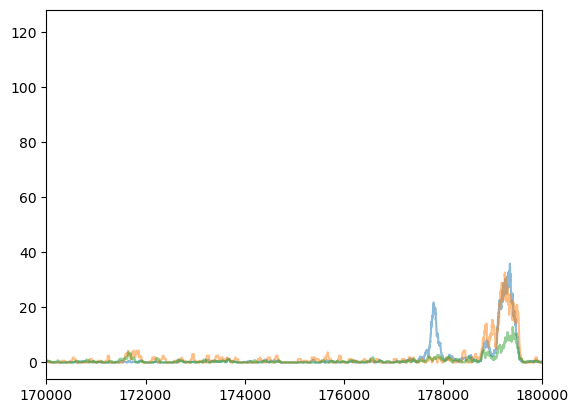

In [6]:
plt.plot(Y_KC,alpha=0.5)
plt.plot(Y_T1,alpha=0.5)
plt.plot(Y_cortex,alpha=0.5)
plt.xlim(170_000,180_000)

In [145]:
print("mean 2L:"+ str(np.mean(Y_2L)))
print('mean 2R:'+ str(np.mean(Y_2R)))
print('mean 3L:'+ str(np.mean(Y_3L)))
print('mean 3R:'+ str(np.mean(Y_3R)))
print('mean 4:'+ str(np.mean(Y_4)))
print('mean X:'+ str(np.mean(Y_X)))
print('mean Y:'+ str(np.mean(Y_Y)))

mean 2L:0.9975310895774041
mean 2R:0.9574466250941243
mean 3L:0.9165913723129601
mean 3R:0.981410788890169
mean 4:1.0147203283529886
mean X:0.8938466782119617
mean Y:0.1772921131276792


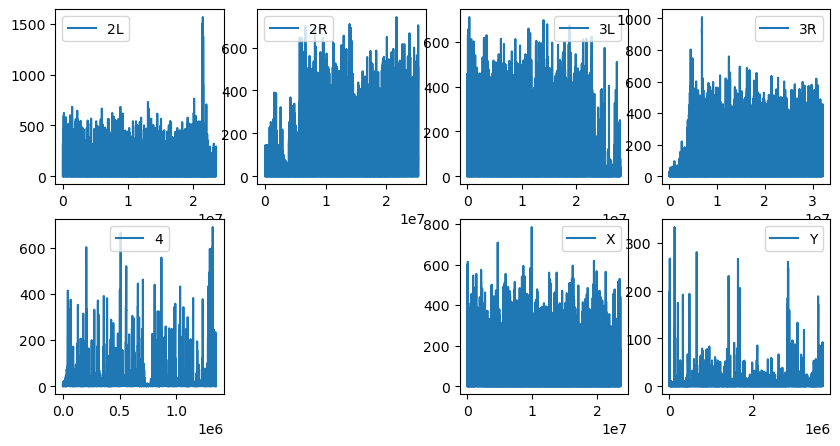

In [15]:
plt.figure(figsize=(10,5))

plt.subplot(2,4,1)
plt.plot(Y_2L,label='2L')
plt.legend()

plt.subplot(2,4,2)
plt.plot(Y_2R,label='2R')
plt.legend()

plt.subplot(2,4,3)
plt.plot(Y_3L,label='3L')
plt.legend()

plt.subplot(2,4,4)
plt.plot(Y_3R,label='3R')
plt.legend()

plt.subplot(2,4,5)
plt.plot(Y_4,label='4')
plt.legend()

plt.subplot(2,4,7)
plt.plot(Y_X,label='X')
plt.legend()

plt.subplot(2,4,8)
plt.plot(Y_Y,label='Y')
plt.legend()

In [ ]:
os.chdir('/home/florian/projet/results')
for file in [ 'T5.dedup.no_blacklist.RPGCnormalized',
 'T4.dedup.no_blacklist.RPGCnormalized',
 'T2a.dedup.no_blacklist.RPGCnormalized',
 'Cortexglia.dedup.no_blacklist.RPGCnormalized',
 'Astrocyte_like.dedup.no_blacklist.RPGCnormalized',
 'Perineurialglia.dedup.no_blacklist.RPGCnormalized',
 'Subperineurialglia.dedup.no_blacklist.RPGCnormalized']:
   cut=40
   Y_2L=np.load('/home/florian/projet/cell_types/scATACseq_'+file+'.bw.npz')['2L'][0]
   Y_2L[Y_2L >= cut] = cut
   Y_2L=Y_2L/cut

   Y_2R=np.load('/home/florian/projet/cell_types/scATACseq_'+file+'.bw.npz')['2R'][0]
   Y_2R[Y_2R >= cut] = cut
   Y_2R=Y_2R/cut

   Y_3L=np.load('/home/florian/projet/cell_types/scATACseq_'+file+'.bw.npz')['3L'][0]
   Y_3L[Y_3L >= cut] = cut
   Y_3L=Y_3L/cut

   Y_3R=np.load('/home/florian/projet/cell_types/scATACseq_'+file+'.bw.npz')['3R'][0]
   Y_3R[Y_3R >= cut] = cut
   Y_3R=Y_3R/cut

   Y_4=np.load('/home/florian/projet/cell_types/scATACseq_'+file+'.bw.npz')['4'][0]
   Y_4[Y_4 >= cut] = cut
   Y_4=Y_4/cut

   Y_X=np.load('/home/florian/projet/cell_types/scATACseq_'+file+'.bw.npz')['X'][0]
   Y_X[Y_X >= cut] = cut
   Y_X=Y_X/cut

   Y_Y=np.load('/home/florian/projet/cell_types/scATACseq_'+file+'.bw.npz')['Y'][0]
   Y_Y[Y_Y >= 10] = 10
   Y_Y=Y_Y/10
   df = pd.read_csv ('/home/florian/projet/models/test_mae_scATACseq_{}.bw.npz/history.csv'.format(file))
   pred2L=np.load('/home/florian/projet/models/preds_test_mae_scATACseq_{}.bw.npz'.format(file))['pred2L']
   pred2R=np.load('/home/florian/projet/models/preds_test_mae_scATACseq_{}.bw.npz'.format(file))['pred2R']
   pred3L=np.load('/home/florian/projet/models/preds_test_mae_scATACseq_{}.bw.npz'.format(file))['pred3L']
   pred3R=np.load('/home/florian/projet/models/preds_test_mae_scATACseq_{}.bw.npz'.format(file))['pred3R']
   pred4=np.load('/home/florian/projet/models/preds_test_mae_scATACseq_{}.bw.npz'.format(file))['pred4']
   predX=np.load('/home/florian/projet/models/preds_test_mae_scATACseq_{}.bw.npz'.format(file))['predX']
   predY=np.load('/home/florian/projet/models/preds_test_mae_scATACseq_{}.bw.npz'.format(file))['predY']
   corr2L=round(np.corrcoef(Y_2L[::10],pred2L)[0][1],3)
   corr2R=round(np.corrcoef(Y_2R[::10],pred2R)[0][1],3)
   corr3R=round(np.corrcoef(Y_3R[1::10],pred3R)[0][1],3)
   corr3L=round(np.corrcoef(Y_3L[::10],pred3L)[0][1],3)
   corr4=round(np.corrcoef(Y_4[1::10],pred4)[0][1],3)
   corrX=round(np.corrcoef(Y_X[1::10],predX)[0][1],3)
   corrY=round(np.corrcoef(Y_Y[::10],predY)[0][1],3)
   mae2L=mae(Y_2L[::10],pred2L)
   mae2R=mae(Y_2R[::10],pred2R)
   mae3L=mae(Y_3L[::10],pred3L)
   mae3R=mae(Y_3R[1::10],pred3R)
   mae4=mae(Y_4[1::10],pred4)
   maeX=mae(Y_X[1::10],predX)
   maeY=mae(Y_Y[::10],predY)


   plt.figure(figsize=(15,10))

   plt.subplot(4,3,1)
   plt.hist2d(pred2L,Y_2L[::10],bins=20,norm=mpl.colors.LogNorm())
   plt.title('corr 2L ='+str(corr2L)+' mae 2L ='+str(mae2L))

   plt.subplot(4,3,2)
   plt.hist2d(pred2R,Y_2R[::10],bins=20,norm=mpl.colors.LogNorm())
   plt.title('corr 2R ='+str(corr2R)+' mae 2R ='+str(mae2R))

   plt.subplot(4,3,4)
   plt.hist2d(pred3L,Y_3L[::10],bins=20,norm=mpl.colors.LogNorm())
   plt.title('corr 3L ='+str(corr3L)+' mae 3L ='+str(mae3L))

   plt.subplot(4,3,5)
   plt.hist2d(pred3R,Y_3R[1::10],bins=20,norm=mpl.colors.LogNorm())
   plt.title('corr 3R ='+str(corr3R)+' mae 3R ='+str(mae3R))

   plt.subplot(4,3,7)
   plt.hist2d(pred4,Y_4[1::10],bins=20,norm=mpl.colors.LogNorm())
   plt.title('corr 4 ='+str(corr4)+' mae 4 ='+str(mae4))

   plt.subplot(4,3,10)
   plt.hist2d(predX,Y_X[1::10],bins=20,norm=mpl.colors.LogNorm())
   plt.title('corr X ='+str(corrX)+' mae X ='+str(maeX))

   plt.subplot(4,3,11)
   plt.hist2d(predY,Y_Y[::10],bins=20,norm=mpl.colors.LogNorm())
   plt.title('corr Y ='+str(corrY)+' mae Y ='+str(maeY))

   plt.subplot(2,3,3)
   plt.plot(df['loss'],label='loss')
   plt.plot(df['val_loss'],label="val_loss")
   plt.legend()
   plt.title('loss values')

   plt.subplot(4,3,8)
   plt.plot(pred2L,label='pred')
   plt.plot(Y_2L[::10],label='label')
   plt.xlim(24_000,26_000)
   plt.legend()
   plt.title('signal vs pred 2L')

   plt.subplot(2,3,6)
   plt.axis([0, 10, 0, 10])
   plt.text(0,9,"list of parameters:")
   plt.text(0,8,"loss: mae+cor, optimizer: adam")
   plt.text(0,7,"generator info: new weights each batch with batches of size 1024")
   plt.text(0,6,"training data: random 2**20 per epoch on X, 3L and 4")
   plt.text(0,5,"validation data: 2**14 on 3R")
   plt.text(0,4,"early stopping patience: 5, over 20 epochs")
   plt.text(0,3,"data on 14 cell types")
   plt.text(0,2,"signal cut at 100")
   plt.text(0,1,"{}".format(file))
   plt.text(0,0,"conv 64 kernel 5, 32 k 11, 16 k 19 w/ windows of size 2001")

   plt.axis("off")

   plt.subplots_adjust(bottom=0.001, top=0.9999)

   plt.savefig('{}_mae.png'.format(file), bbox_inches='tight')

In [99]:
cut=500
Y_3L=np.load('/home/florian/projet/scATACseq_14chr.npz')['3L'][0]
Y_3L[Y_3L >= cut] = cut
Y_3L=Y_3L/cut
Y_X=np.load('/home/florian/projet/scATACseq_14chr.npz')['X'][0]
Y_X[Y_X >= cut] = cut
Y_X=Y_X/cut


Text(0.5, 1.0, '15357255-15400802 on 3L')

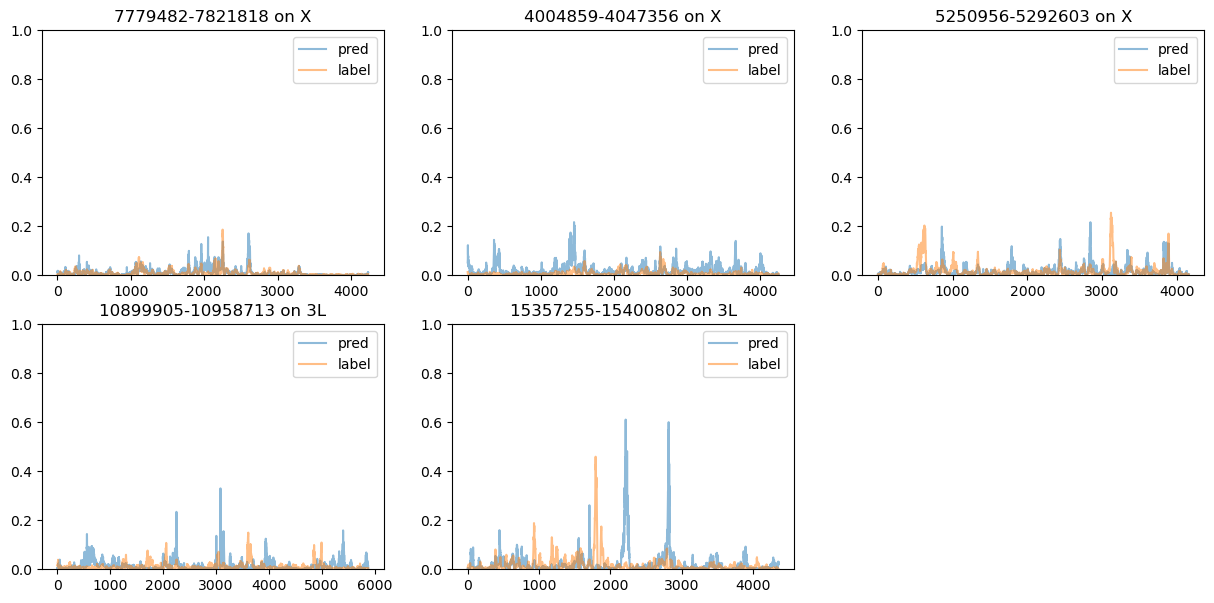

In [101]:
plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
plt.plot(predX[7779482//10:7821818//10],alpha=0.5,label="pred")
plt.plot(Y_X[7779482:7821818:10],alpha=0.5,label="label")
plt.ylim(0,1)
plt.legend()
plt.title('7779482-7821818 on X')

plt.subplot(2,3,2)
plt.plot(predX[4004859//10:4047356//10],alpha=0.5,label="pred")
plt.plot(Y_X[4004859:4047356:10],alpha=0.5,label="label")
plt.ylim(0,1)
plt.legend()
plt.title('4004859-4047356 on X')

plt.subplot(2,3,3)
plt.plot(predX[5250956//10:5292603//10],alpha=0.5,label="pred")
plt.plot(Y_X[5250956:5292603:10],alpha=0.5,label="label")
plt.ylim(0,1)
plt.legend()
plt.title('5250956-5292603 on X')

plt.subplot(2,3,4)
plt.plot(predX[10899905//10:10958713//10],alpha=0.5,label="pred")
plt.plot(Y_3L[10899905:10958713:10],alpha=0.5,label="label")
plt.ylim(0,1)
plt.legend()
plt.title('10899905-10958713 on 3L')

plt.subplot(2,3,5)
plt.plot(predX[15357255//10:15400802//10],alpha=0.5,label="pred")
plt.plot(Y_3L[15357255:15400802:10],alpha=0.5,label="label")
plt.ylim(0,1)
plt.legend()
plt.title('15357255-15400802 on 3L')

Text(0.5, 1.0, '10899-10959 kb on 3L')

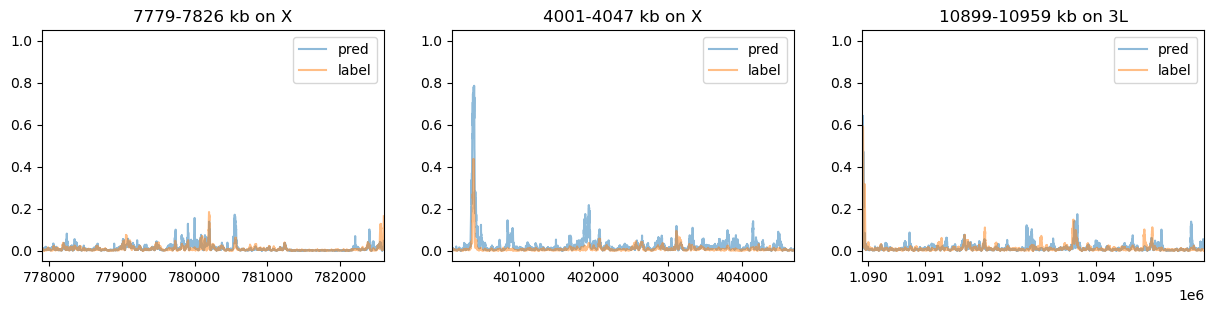

In [52]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.plot(predX,alpha=0.5,label="pred")
plt.plot(Y_X[::10],alpha=0.5,label="label")
plt.xlim(7779*100,7826*100)
plt.legend()
plt.title('7779-7826 kb on X')

plt.subplot(1,3,2)
plt.plot(predX,alpha=0.5,label="pred")
plt.plot(Y_X[::10],alpha=0.5,label="label")
plt.xlim(4001*100,4047*100)
plt.legend()
plt.title('4001-4047 kb on X')

plt.subplot(1,3,3)
plt.plot(pred3L,alpha=0.5,label="pred")
plt.plot(Y_3L[::10],alpha=0.5,label="label")
plt.xlim(10899*100,10959*100)
plt.legend()
plt.title('10899-10959 kb on 3L')

Text(0.5, 1.0, '10799-11059 kb on 3L')

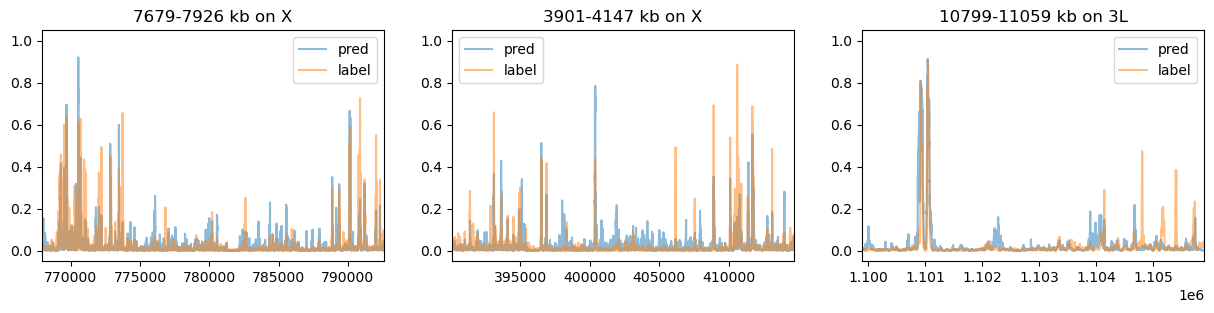

In [55]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.plot(predX,alpha=0.5,label="pred")
plt.plot(Y_X[::10],alpha=0.5,label="label")
plt.xlim(7679*100,7926*100)
plt.legend()
plt.title('7679-7926 kb on X')

plt.subplot(1,3,2)
plt.plot(predX,alpha=0.5,label="pred")
plt.plot(Y_X[::10],alpha=0.5,label="label")
plt.xlim(3901*100,4147*100)
plt.legend()
plt.title('3901-4147 kb on X')

plt.subplot(1,3,3)
plt.plot(pred3L,alpha=0.5,label="pred")
plt.plot(Y_3L[::10],alpha=0.5,label="label")
plt.xlim(10999*100,11059*100)
plt.legend()
plt.title('10799-11059 kb on 3L')

In [8]:
class MySequence(tf.keras.utils.Sequence):

    def __init__(self, x_set, batch_size, WINDOW=2001):
        self.x = x_set
        self.batch_size = batch_size
        self.WINDOW = WINDOW
        self.indices = np.arange(len(self.x))
        self.indices=self.indices[self.WINDOW//2:len(self.x)-self.WINDOW//2 -1]

    def __len__(self):
        return int(np.ceil(len(self.indices) / self.batch_size))

    def __getitem__(self, idx):
        batch_indices = self.indices[idx*self.batch_size:(idx+1)*self.batch_size]
        window_indices = batch_indices.reshape(-1, 1) + np.arange(-(self.WINDOW//2), self.WINDOW//2 + 1).reshape(1, -1)
        batch_x = self.x[window_indices]
        return batch_x

X_chr2L=MySequence(X_2L[:10000],16)

In [6]:
from keras.models import load_model
model_name='new_cut_weightless'
model2 = load_model('/home/florian/projet/models/'+ model_name +'/'+ model_name+ '.h5', compile=False)

In [7]:
def compute_saliency_map(input_seq, model):
    # Compute the gradients of the output with respect to the input
    input_seq=tf.cast(input_seq,tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(input_seq)
        output = model(tf.expand_dims(input_seq,0))
    grads = tape.gradient(output, input_seq)
    

    # Compute the saliency map
    saliency_map = grads #tf.multiply(input_seq, grads)

    # Sum the saliency map over the channel dimension
    saliency_map = tf.reduce_sum(saliency_map, axis=-1)

    # # Normalize the saliency map
    # saliency_map = tf.math.abs(saliency_map)
    # saliency_map /= tf.reduce_max(saliency_map)

    # Return the saliency map
    return saliency_map

In [8]:
def compute_saliency_channels(input_seq, model):
    # Compute the gradients of the output with respect to the input
    input_seq=tf.cast(input_seq,tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(input_seq)
        output = model(tf.expand_dims(input_seq,0))
    grads = tape.gradient(output, input_seq)

    # Compute the saliency map
    saliency_map = grads #tf.multiply(input_seq, grads)

    # # Normalize the saliency map
    # saliency_map = tf.math.abs(saliency_map)
    # saliency_map /= tf.reduce_max(saliency_map)

    # Return the saliency map
    return saliency_map

In [9]:
def fast_pred(input,model):
    model=model
    return model(tf.expand_dims(tf.cast(input,tf.float32),0))

In [10]:
def fast_pred_seq(input,window_start,model):
    model=model
    X=[]
    for i in range(window_start,window_start+2001):
        X.append(np.array(fast_pred(input[i-1000:i+1001],model))[0])
    return(X)

In [11]:
def get_max(array,n):
    return ((-array).argsort()[:n])

In [12]:
def get_min(array,n):
    return (array.argsort()[:n])

In [13]:
def mutation(window_start,chr, vals):
    mut=np.copy(chr)
    for i in vals:
        if 0 < i <= 2001:
            mut[i+window_start]=np.roll(mut[i+window_start],1)
        elif 2001 < i <=4002:
            mut[i+window_start-2001]=np.roll(mut[i+window_start-2001],1)
        elif 4002 < i <=6003:
            mut[i+window_start-4002]=np.roll(mut[i+window_start-4002],1)
        else:
            mut[i+window_start-6003]=np.roll(mut[i+window_start-6003],1)
    return mut

In [14]:
def window_map(input,window_start,model):
    model=model
    Y=np.zeros(4002)
    for i in range (-1000,1000):
        x=np.array(compute_saliency_map(tf.cast(input[window_start+i:window_start+2001+i],tf.float32),model))
        y=np.concatenate((np.zeros(1000+i),x,np.zeros(1001-i)))
        Y=np.vstack([Y,y])
    return(Y)

In [584]:
#pic !!!
start =489_700
stop = start + 2_001

In [15]:
#flat
start =500_000
stop = start + 2_001

(0.0, 1.0)

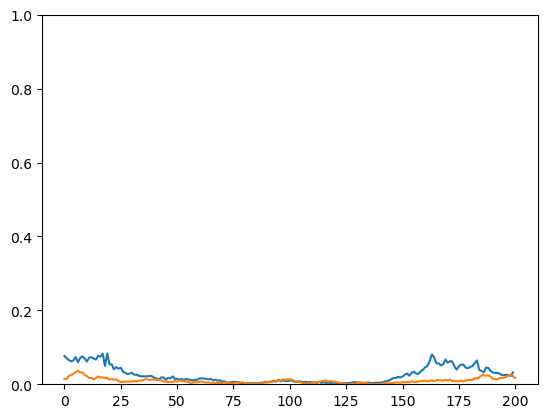

In [730]:
plt.plot(pred2L[start//10:stop//10])
plt.plot(Y_2L[start:stop:10])
plt.ylim(0,1)

In [16]:
fast_2L=fast_pred_seq(X_2L,start,model2)

2023-04-03 15:14:12.114434: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-04-03 15:14:12.671689: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-03 15:14:13.166735: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [17]:
MAP=window_map(X_2L,start,model2)

In [18]:
saliency_map=np.array(compute_saliency_channels(X_2L[start:stop],model2))

In [19]:
attr_map = saliency_map - np.mean(saliency_map, axis=1, keepdims=True)

In [20]:
saliencyDF=pd.DataFrame(saliency_map[700:1300], columns=["A", "C", "G", "T"])

In [21]:
attrDF=pd.DataFrame(attr_map[700:1300], columns=["A", "C", "G", "T"])

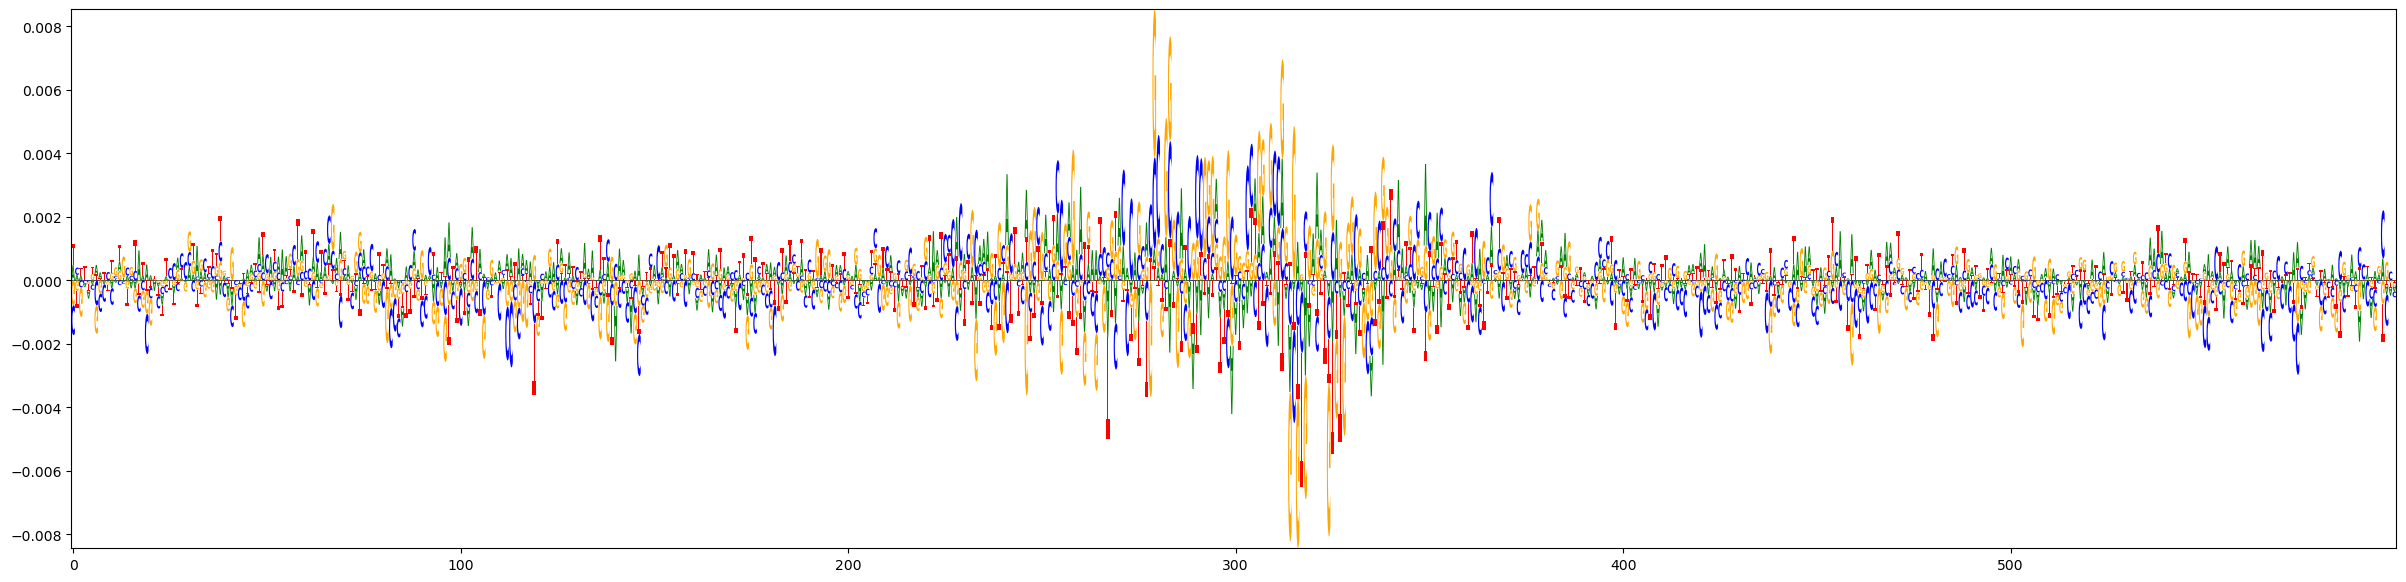

In [22]:
lm.Logo(saliencyDF, figsize=(30, 7))

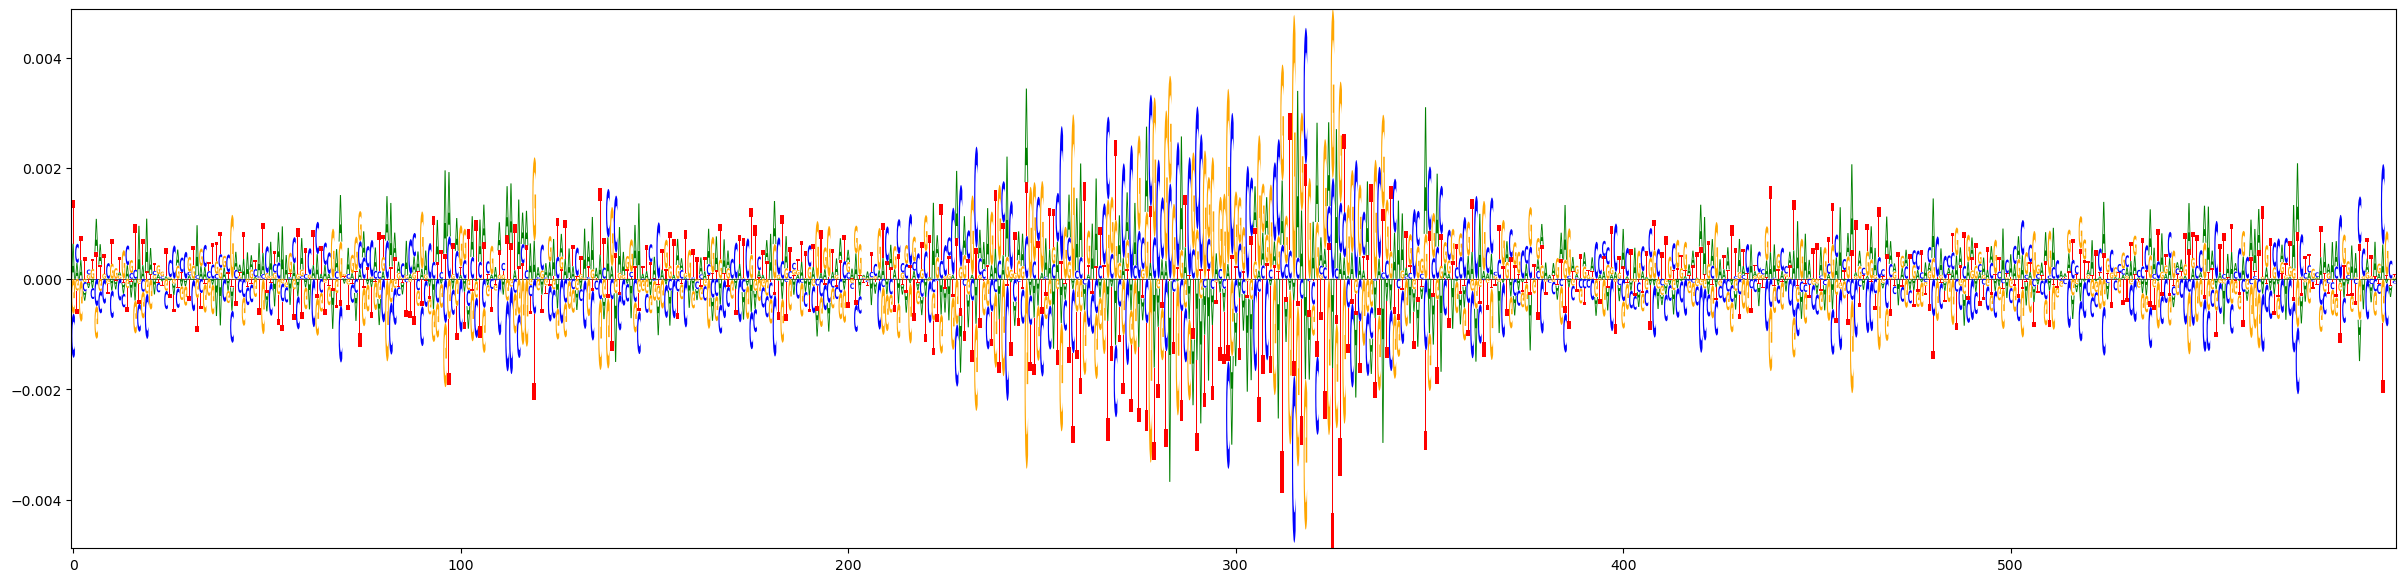

In [23]:
lm.Logo(attrDF, figsize=(30, 7))

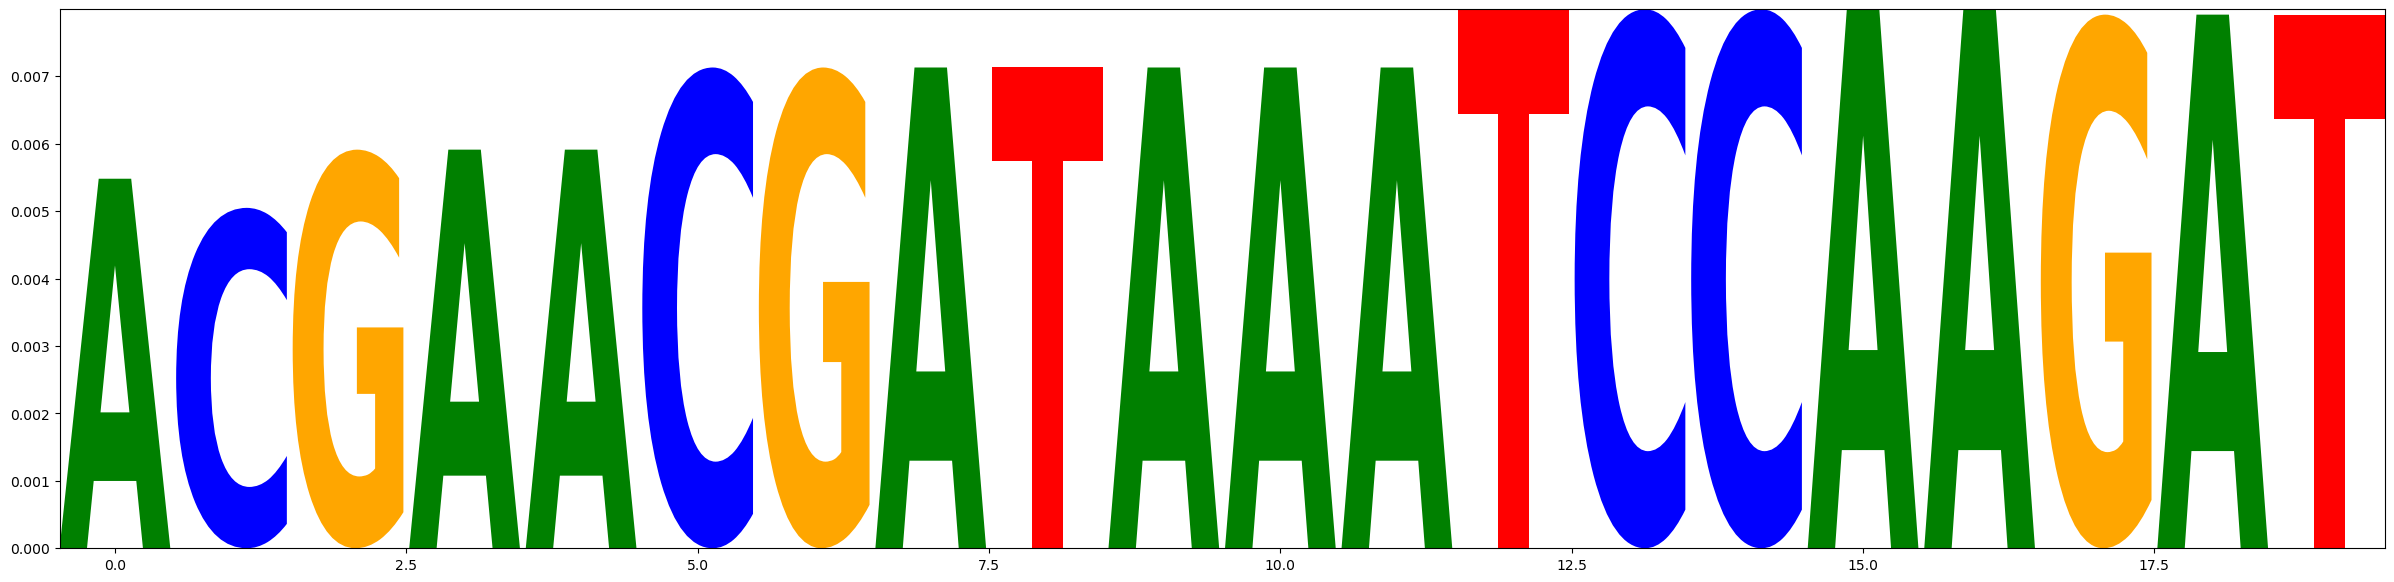

In [190]:
midp = start+(stop-start)
df = pd.DataFrame(X_2L[midp:midp+20,:]*Y_2L[midp:midp+20].reshape((-1,1)), columns=["A", "C", "G", "T"])
lm.Logo(df, figsize=(30, 7))

In [24]:
sal=compute_saliency_channels(X_2L[start:stop],model2)

In [25]:
vals=np.concatenate((np.array(sal[:,0]),np.array(sal[:,1]),np.array(sal[:,2]),np.array(sal[:,3])))

In [26]:
vals_idx=get_max(vals,10)

In [27]:
vals_idx_2=get_min(vals,10)

In [28]:
M_2L=mutation(start,X_2L,vals_idx)

In [29]:
M_2L_2=mutation(start,X_2L,vals_idx_2)

In [30]:
fast_M2L=fast_pred_seq(M_2L,start,model2)

In [31]:
fast_M2L_2=fast_pred_seq(M_2L_2,start,model2)

In [32]:
saliency= saliency_map - np.mean(saliency_map, axis=1, keepdims=True)

In [773]:
saliency_map=compute_saliency_channels(X_2L[start:stop],model2)

In [777]:
saliency=saliency-(saliency*X_2L[start:stop])

In [90]:
#highest value method
mod_loop=np.copy(X_2L)
sal_loop=compute_saliency_channels(mod_loop[start:stop],model2)
mod_sal=sal_loop-(sal_loop*X_2L[start:stop])
mod_vals=np.concatenate((np.array(mod_sal[:,0]),np.array(mod_sal[:,1]),np.array(mod_sal[:,2]),np.array(mod_sal[:,3])))
mod_vals_idx=get_max(mod_vals,10)
mod_M_2L=mutation(start,mod_loop,mod_vals_idx)
best_pred=fast_pred(mod_M_2L[start:stop],model2)
L=[]
for i in range(50_000):
    mod_loop=np.copy(mod_M_2L)
    sal_loop=compute_saliency_channels(mod_loop[start:stop],model2)
    mod_sal=sal_loop-(sal_loop*X_2L[start:stop])
    mod_vals=np.concatenate((np.array(mod_sal[:,0]),np.array(mod_sal[:,1]),np.array(mod_sal[:,2]),np.array(mod_sal[:,3])))
    mod_vals_idx=get_max(mod_vals,10)
    mod_M_2L=mutation(start,mod_loop,mod_vals_idx)
    if fast_pred(mod_M_2L[start:stop],model2) > best_pred:
        L.append(i)
        best_pred=fast_pred(mod_M_2L[start:stop],model2)
        omega_pred=mod_M_2L
fast_mod_M2L=fast_pred_seq(mod_M_2L,start,model2)
print(L)

[0, 1, 3, 6, 9, 16, 37, 39, 40, 41, 7840, 8050, 8197, 8464, 8671, 8692, 8747]


In [91]:
fast_mod_M2L=fast_pred_seq(omega_pred,start,model2)

In [87]:
#weighted probabilities method
#highest value method
mod_loop=np.copy(X_2L)
sal_loop=compute_saliency_channels(mod_loop[start:stop],model2)
mod_sal=sal_loop-(sal_loop*X_2L[start:stop])
mod_vals=np.concatenate((np.array(mod_sal[:,0]),np.array(mod_sal[:,1]),np.array(mod_sal[:,2]),np.array(mod_sal[:,3])))
mod_vals_idx=get_max(mod_vals,10)
mod_M_2L=mutation(start,mod_loop,mod_vals_idx)
best_pred=fast_pred(mod_M_2L[start:stop],model2)
L=[]
for i in range(1000):
    mod_loop=np.copy(mod_M_2L)
    sal_loop=compute_saliency_channels(mod_loop[start:stop],model2)
    sal_loop=sal_loop-(sal_loop*X_2L[start:stop])
    mod_vals=np.concatenate((np.array(sal_loop[:,0]),np.array(sal_loop[:,1]),np.array(sal_loop[:,2]),np.array(sal_loop[:,3])))
    temp=mod_vals[mod_vals<=0]
    temp=(temp/sum(temp))
    mod_vals_value=rd.choices(mod_vals[mod_vals<=0], weights=temp, k=1)
    mod_vals_idx=np.where(mod_vals==mod_vals_value)
    mod_M_2L=mutation(start,mod_loop,mod_vals_idx)
    if fast_pred(mod_M_2L[start:stop],model2) > best_pred:
        best_pred=fast_pred(mod_M_2L[start:stop],model2)
        L.append(best_pred)
fast_mod_M2L=fast_pred_seq(mod_M_2L,start,model2)
print(max(L))

ValueError: max() arg is an empty sequence

Text(0.5, 1.0, '500000-502001')

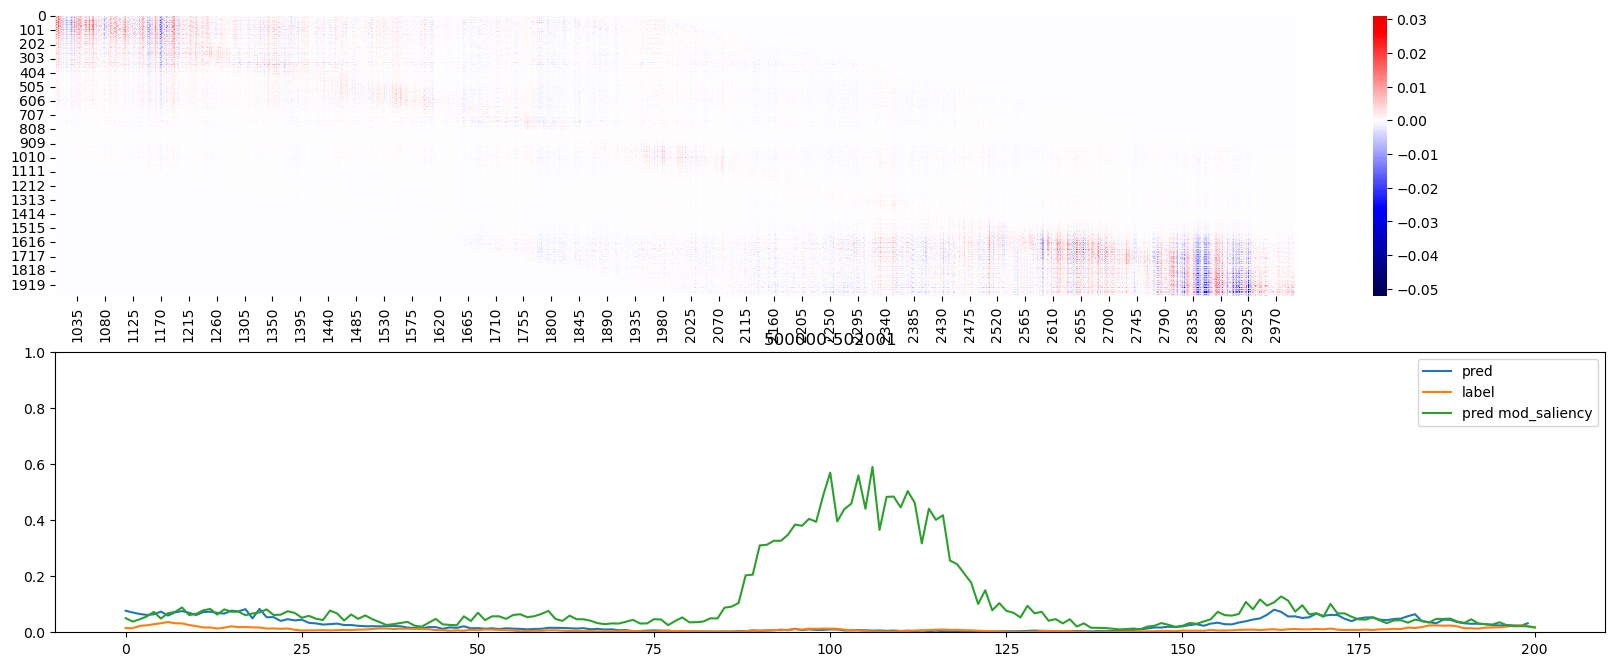

In [92]:
import seaborn as sns
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
sns.heatmap(MAP, cmap='seismic',center=0)
plt.xlim(1000,3001)

plt.subplot(2,1,2)
plt.plot(pred2L[start//10:stop//10],label='pred')
plt.plot(Y_2L[start:stop:10],label='label')
# plt.plot(fast_M2L[::10],label='pred mutation')
# plt.plot(fast_M2L_2[::10],label='pred mutation_2')
plt.plot(fast_mod_M2L[::10],label='pred mod_saliency')
plt.legend()
plt.ylim(0,1)
plt.title(str(start)+ '-' +str(stop))

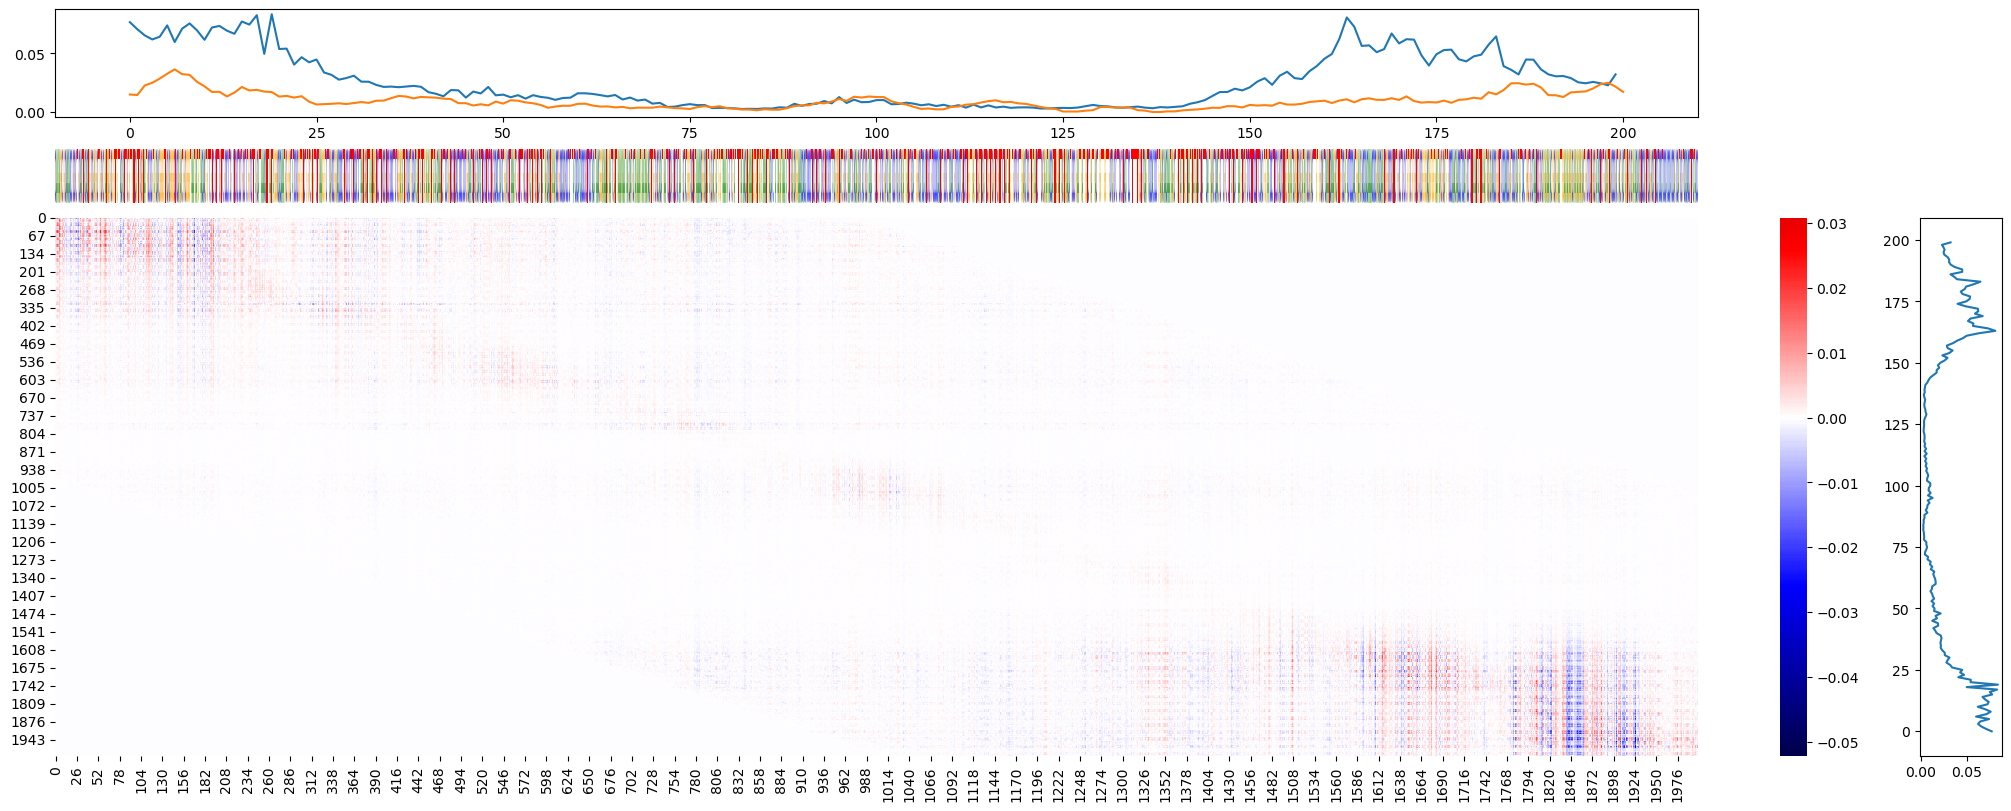

In [758]:
plot_start = start

plot_stop = stop

fig, axes = plt.subplots(3, 2, figsize=(20, 8),layout='constrained', gridspec_kw={'width_ratios': [20, 1], 'height_ratios': [2, 1, 10]})

fig.set_facecolor('w')
axes[0, 0].plot(pred2L[plot_start//10:plot_stop//10], label='pred')
axes[0, 0].plot(Y_2L[plot_start:plot_stop:10], label='label')

lm.Logo(pd.DataFrame(X_2L[plot_start:plot_stop], columns=list('ACGT')), ax=axes[1, 0])

axes[1, 0].set_axis_off()

sns.heatmap(MAP[:,1000:3001], cmap='seismic', center=0, ax=axes[2, 0])#,xticklabels=100, yticklabels=50)

axes[2, 1].plot(pred2L[start//10:stop//10], np.arange(200), label='predictions')

axes[0, 1].remove()
axes[1, 1].remove()
# axes[2, 1].remove()

plt.show()
plt.close()

<AxesSubplot: >

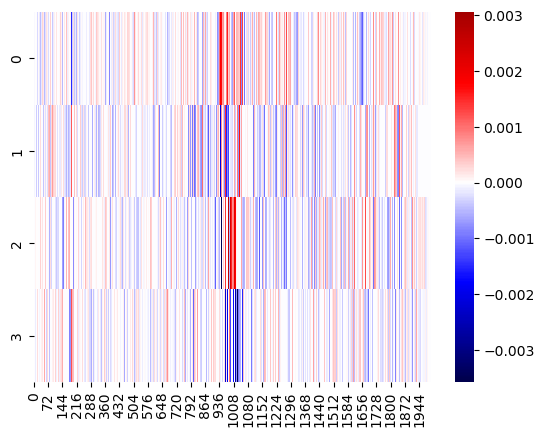

In [780]:
sns.heatmap(np.array(saliency).T, cmap='seismic',center=0)
# plt.xlim(936,1080)

Text(0.5, 1.0, '500000-502001')

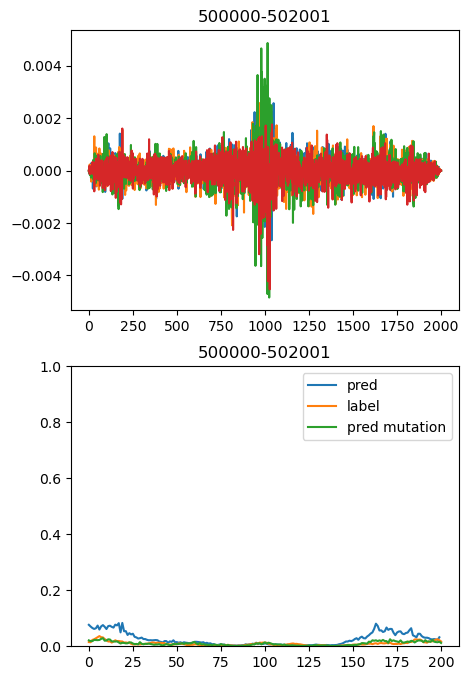

In [573]:
plt.figure(figsize=(5,8))

plt.subplot(2,1,1)
plt.plot(a)#[850:900])
plt.title(str(start)+ '-' +str(stop))

plt.subplot(2,1,2)
plt.plot(pred2L[start//10:stop//10],label='pred')
plt.plot(Y_2L[start:stop:10],label='label')
plt.plot(fast_M2L[::10],label='pred mutation')
plt.legend()
plt.ylim(0,1)
plt.title(str(start)+ '-' +str(stop))